In [1]:
import numpy as np

import torch
from torch import nn
from torch import functional as F

from livelossplot import PlotLosses

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from Inference import BBVI 
from Inference import VariationalBoosting

In [3]:
from Inference.BBVI import VariationalNetwork
from Inference.VariationalBoosting import MixtureVariationalNetwork
from Inference.VariationalBoosting import VariationalBoostingOptimizer

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
sigma_noise = 0.1
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [76]:
mix = MixtureVariationalNetwork(1, 1, 20, 2, device=device)

In [77]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.2}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 5, 'factor': 0.8}

In [78]:
vboptimizer = VariationalBoostingOptimizer(mixture=mix, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)

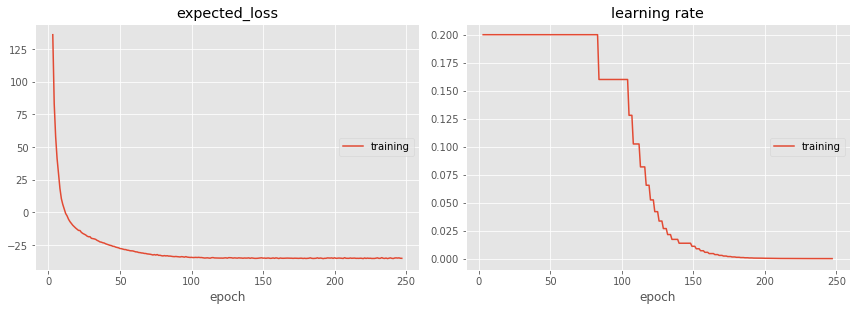

expected_loss:
training   (min:  -35.536, max: 75273.930, cur:  -35.320)

learning rate:
training   (min:    0.000, max:    0.200, cur:    0.000)


C:\Users\Patrick\Anaconda3\envs\MachineLearningV1\lib\site-packages\ipykernel_launcher.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [82]:
mix = vboptimizer.run((x_data,y_data), nb_component=1, n_epoch=10000, n_iter=100, n_ELBO_samples=75, plot=True)

In [85]:
mix.components[1]

VariationalNetwork(
  (linear1): ProbabilisticLinear()
  (linear2): ProbabilisticLinear()
)

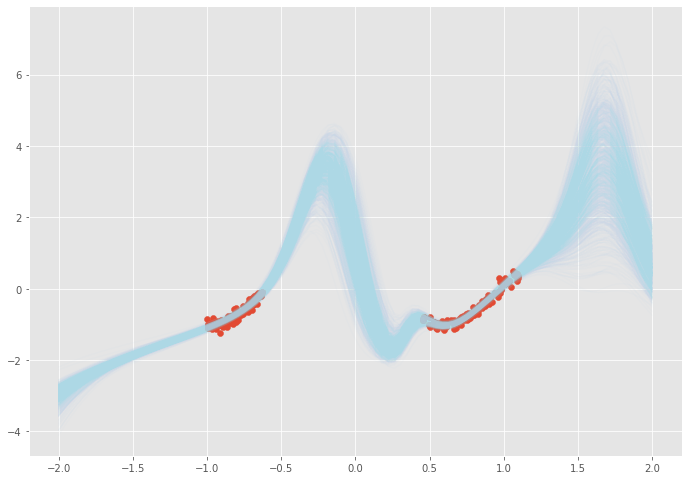

In [87]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    mix.components[1].sample_parameters()

    y_test = mix.components[1].forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')

In [27]:
mix.components

[VariationalNetwork(
   (linear1): ProbabilisticLinear()
   (linear2): ProbabilisticLinear()
 )]